# Pandas Data Plotting

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Time Series Data Plotting

<AxesSubplot:>

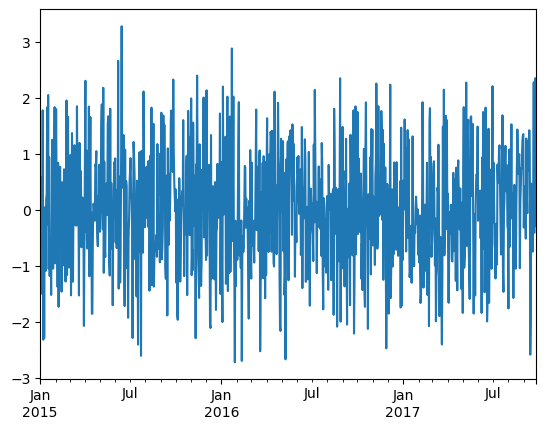

In [8]:
# plot random time series data
df1 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2015', periods=1000))
df1.plot()

<AxesSubplot:>

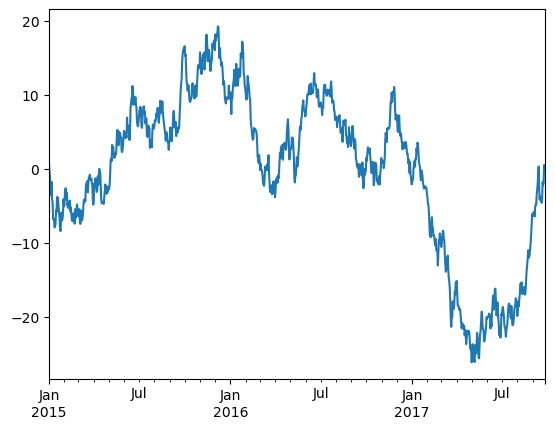

In [9]:
# plot random time series cumulative data
df1 = df1.cumsum()
df1.plot()

<AxesSubplot:>

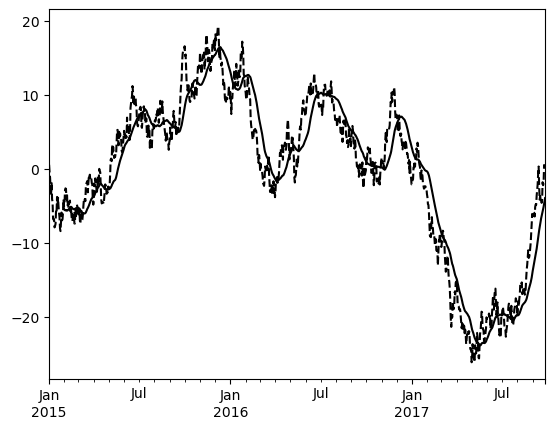

In [13]:
# rolling data by splitting data to window size 
# analyze data trend by rolling data
df1_r = df1.rolling(window=30)
df1.plot(style='k--')
df1_r.mean().plot(style='k') # moving average

<AxesSubplot:>

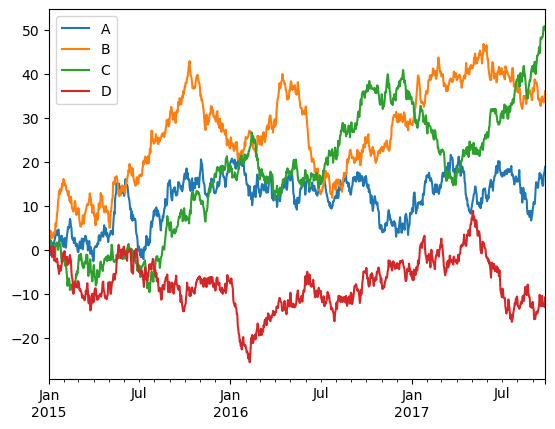

In [19]:
# plot time dataframe data
df2 = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=pd.date_range('1/1/2015', periods=1000), 
    columns=['A', 'B', 'C', 'D']
)
df2 = df2.cumsum()
df2.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

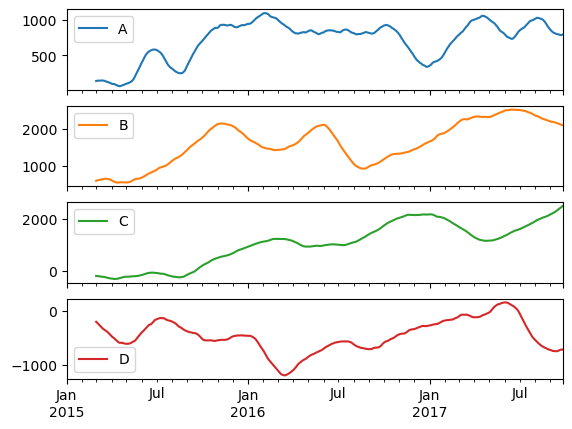

In [20]:
# rolling data by splitting data to window size with subplot
df2.rolling(window=60).sum().plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

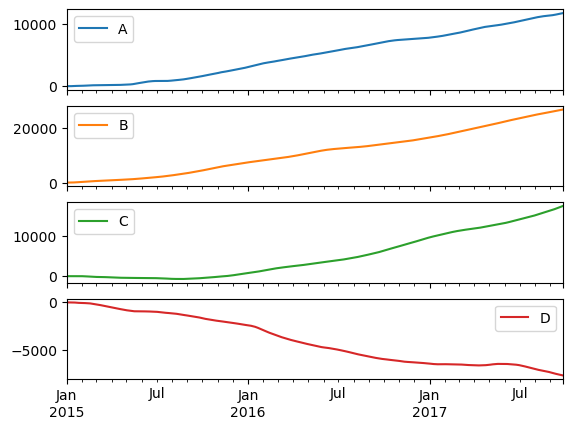

In [21]:
# expanding data by min_period (cumulative operation)
df2.expanding(min_periods=1).sum().plot(subplots=True)

### Pandas Bar Plotting

In [29]:
# prepare data
ts1 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df3 = pd.DataFrame(np.random.randn(1000, 4), index=ts1.index, columns=list('ABCD'))
df3.head(2)

,A,B,C,D
2000-01-01,-0.824057,1.949203,-0.129457,0.353467
2000-01-02,-0.084159,2.394519,-0.361128,0.313404


<AxesSubplot:>

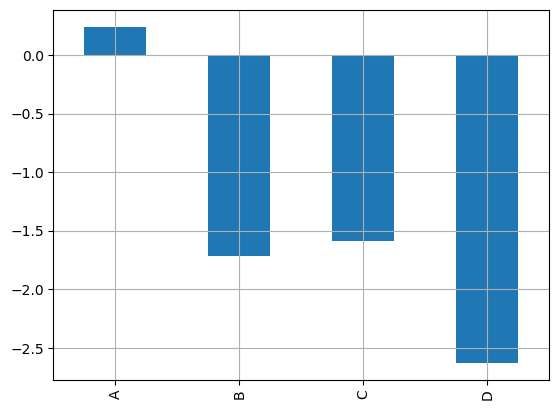

In [71]:
# plot 6th data by bar plot
# grid option for plotting grid
## df3.iloc[5].plot.bar()
df3.iloc[5].plot(kind='bar', grid=True)

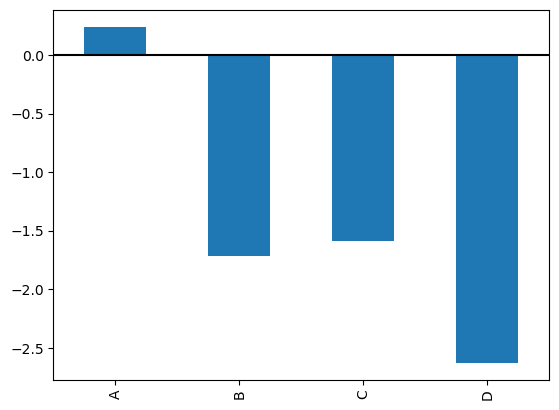

In [38]:
# plot bar with horizontal line
df3.iloc[5].plot.bar()
plt.axhline(0, color='k')

<AxesSubplot:>

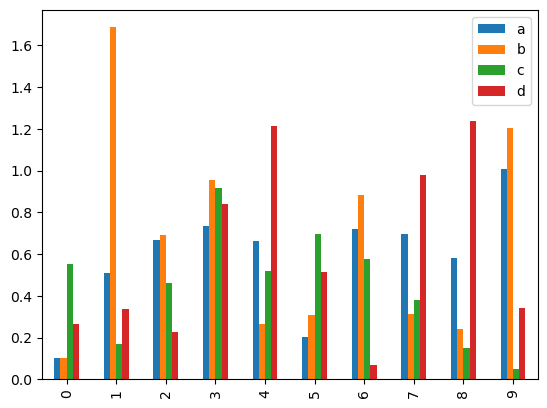

In [42]:
# plot multiple data
df4 = pd.DataFrame(np.abs(np.random.randn(10, 4)), columns=list('abcd'))
df4.plot.bar()

<AxesSubplot:>

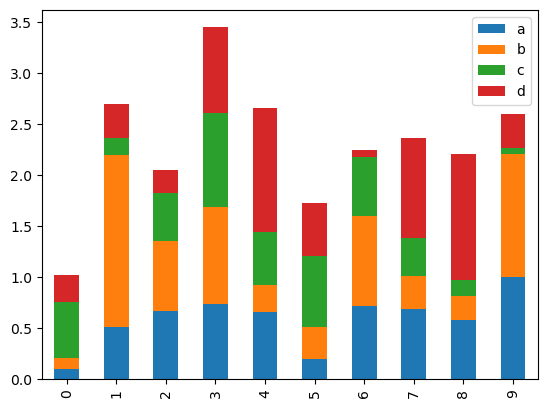

In [43]:
# plot multiple stacked data
df4.plot.bar(stacked=True)

<AxesSubplot:>

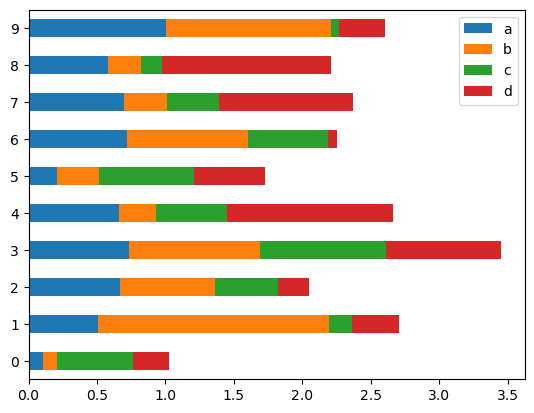

In [44]:
# plot multiple stacked data by horizontal line
df4.plot.barh(stacked=True)

### Pandas Histogram Plotting

In [45]:
# prepare data
df5 = pd.DataFrame({
    'a': np.random.randn(1000) + 1,
    'b': np.random.randn(1000),
    'c': np.random.randn(1000) - 1
}, columns=list('abc'))
df5.head()

,a,b,c
0,-0.943602,0.070163,-0.165894
1,0.297168,1.525856,-1.726005
2,2.605121,-0.401060,-0.983464
3,0.724867,0.824732,-0.425034
4,3.273617,-0.690854,-0.703306


<AxesSubplot:ylabel='Frequency'>

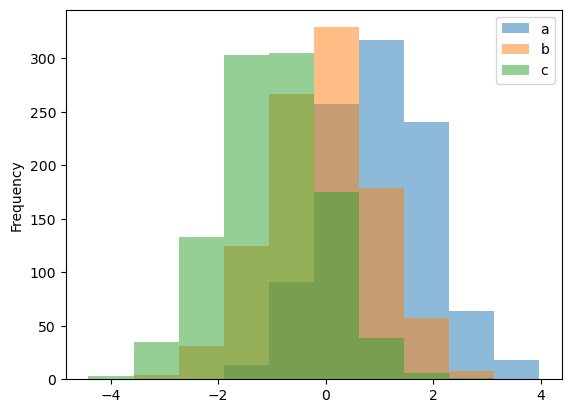

In [46]:
# plot histogram using data
df5.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

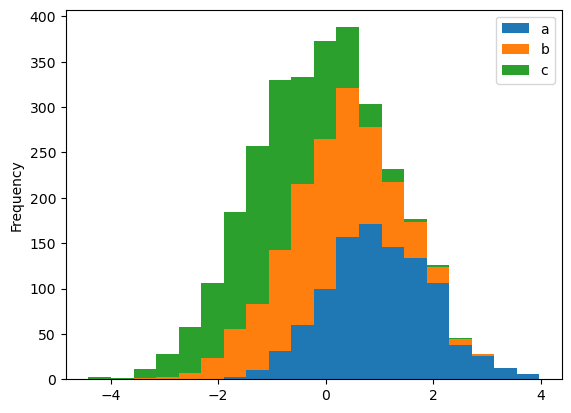

In [47]:
# plot histogram using stacked data
# bin: split counter
df5.plot.hist(stacked=True, bins=20)

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

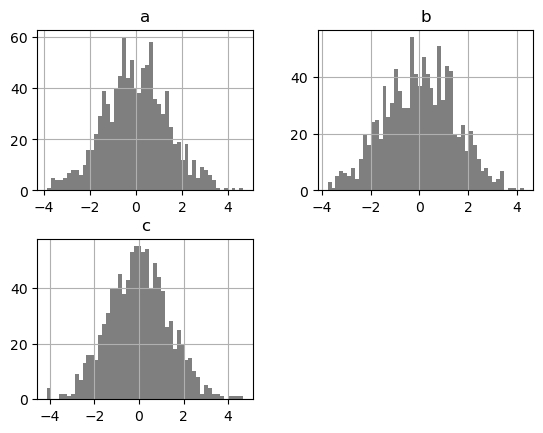

In [51]:
# data difference histogram plotting
df5.diff().hist(color='k', alpha=0.5, bins=50)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

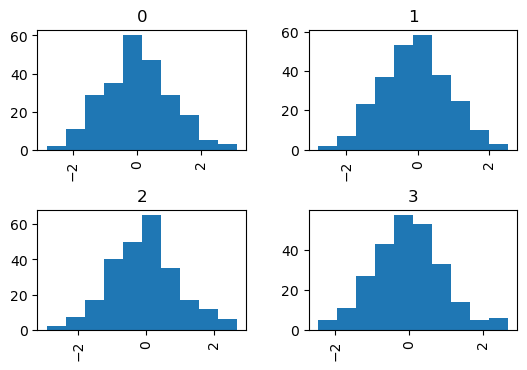

In [52]:
# prepare categorical data and plot it by seperated histogram
df6 = pd.DataFrame({
    'a': np.random.randn(1000),
    'b': np.random.randint(0, 4, 1000)
})
df6['a'].hist(by=df6['b'], figsize=(6, 4))

### Pandas Box Plotting


<AxesSubplot:>

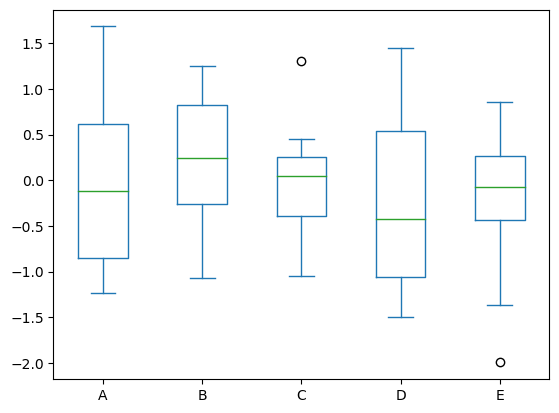

In [60]:
# prepare data and plot box
# box plot uses min, 25%, 50%, 75%, max
# use vert option to plot horizontal or vertical
df7 = pd.DataFrame(np.random.randn(10, 5), columns=list('ABCDE'))
df7.plot.box()

<AxesSubplot:>

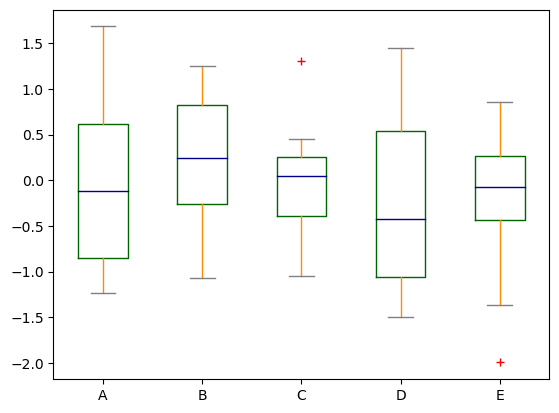

In [62]:
# change colors of each column box
color = {
    'boxes': 'DarkGreen',
    'whiskers': 'DarkOrange',
    'medians': 'DarkBlue',
    'caps': 'Gray'
}
df7.plot.box(color=color, sym='r+')

array([<AxesSubplot:title={'center':'A'}, xlabel='[X]'>,
       <AxesSubplot:title={'center':'B'}, xlabel='[X]'>], dtype=object)

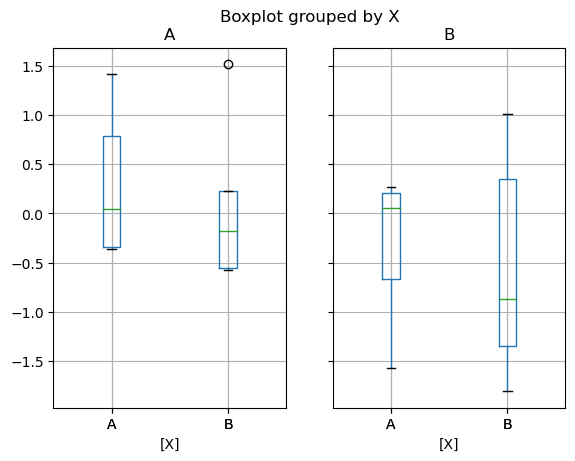

In [64]:
# # prepare categorical data and plot it by grouped boxplot
df8 = pd.DataFrame(np.random.randn(10, 2), columns=['A', 'B'])
df8['X'] = pd.Series(['A', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B'])
df8.boxplot(by='X')

### Pandas Area Plotting

<AxesSubplot:>

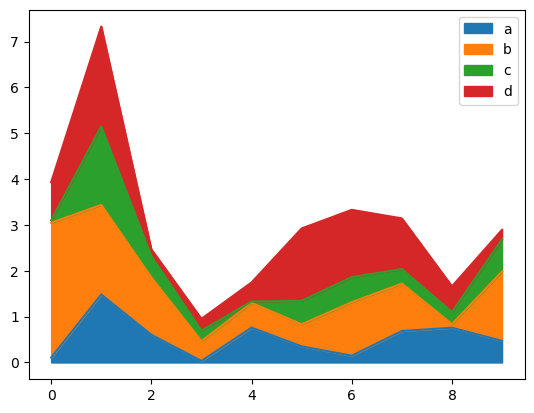

In [67]:
# prepare data and plot area plot
# do not allow for negative values
# default is stacked
df9 = pd.DataFrame(np.abs(np.random.randn(10, 4)), columns=list('abcd'))
df9.plot.area()

<AxesSubplot:>

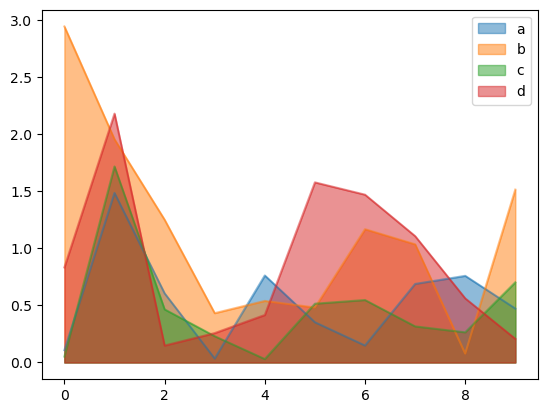

In [70]:
# area plot for non-stacked data
df9.plot.area(stacked=False)

### Pandas Scatter Plotting

<AxesSubplot:xlabel='a', ylabel='b'>

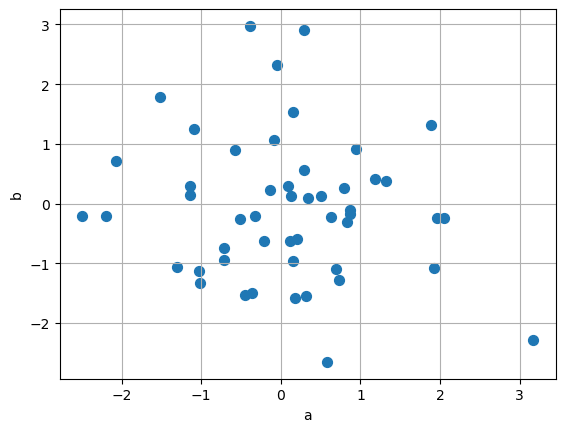

In [74]:
# prepare data and scatter data
# do not forget to set up columns for x and y axis
df10 = pd.DataFrame(np.random.randn(50, 4), columns=list('abcd'))
df10.plot.scatter(x='a', y='b', s=50, grid=True)

<AxesSubplot:xlabel='c', ylabel='d'>

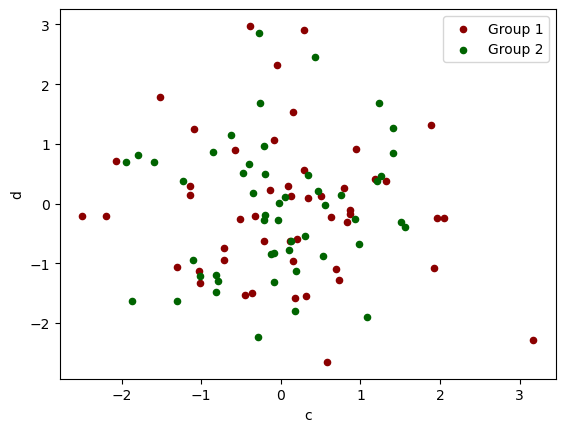

In [79]:
# scatter data by groups
ax = df10.plot.scatter(x='a', y='b', label='Group 1', color='DarkRed')
df10.plot.scatter(x='c', y='d', label='Group 2', color='DarkGreen', ax=ax)

<AxesSubplot:xlabel='a', ylabel='b'>

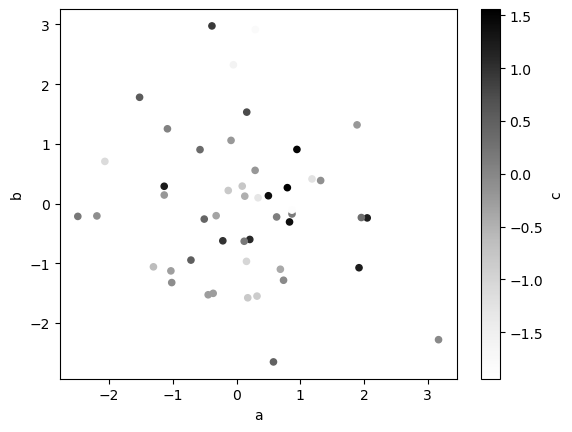

In [81]:
# add new colorbar axis on scatter plot
# like color histogram
df10.plot.scatter(x='a', y='b', c='c')

### Pandas Hexagonal Bin Plotting

<AxesSubplot:xlabel='a', ylabel='b'>

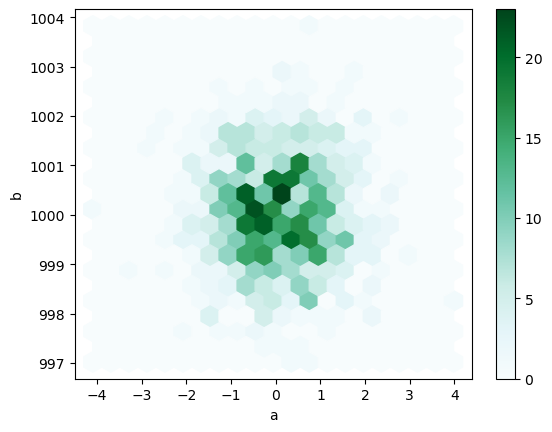

In [84]:
# Hexabin plot covers drawback of scatter and histogram: scatter + histogram
# used on large data
# prepare data and plot hexabin
df11 = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df11['b'] = df11['b'] + 1000
df11.plot.hexbin(x='a', y='b', gridsize=20)

<AxesSubplot:xlabel='a', ylabel='b'>

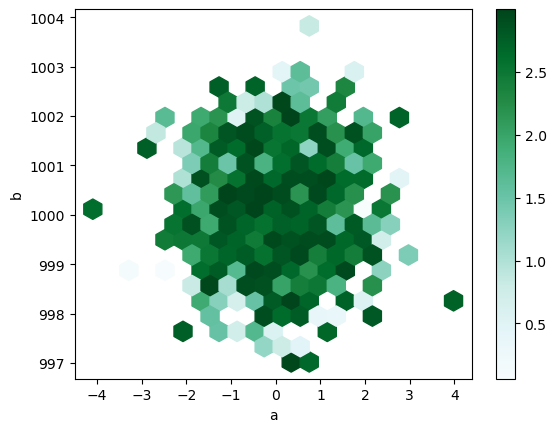

In [86]:
# prepare new column and plot hexabin
# reduce_c_function reduces every values of bin to single value by c_function
df11['z'] = np.random.uniform(0, 3, 1000)
df11.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=20)

### Pandas Pie Chart Plotting

<AxesSubplot:ylabel='series'>

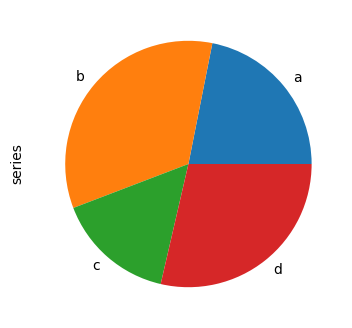

In [98]:
# prepare data and plot pie chart
# do not allow negative values
ts2 = pd.Series(np.abs(3 * np.random.randn(4)), index=list('abcd'), name='series')
ts2.plot.pie(figsize=(6, 4))

<AxesSubplot:ylabel='series'>

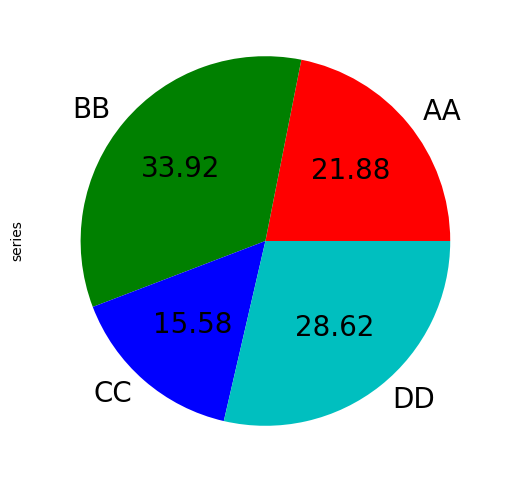

In [99]:
# plot pie chart with multiple options
ts2.plot.pie(
    labels=['AA', 'BB', 'CC', 'DD'],
    colors=['r', 'g', 'b', 'c'],
    autopct='%.2f',
    fontsize=20,
    figsize=(6, 6)
)

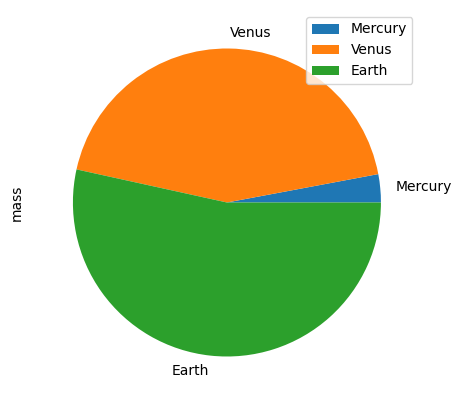

In [93]:
# prepare data and plot pie chart
# select column by y option
df12 = pd.DataFrame({
    'mass': [0.330, 4.87, 5.97],
    'radius': [2439.7, 6051.8, 6378.1]
}, index=['Mercury', 'Venus', 'Earth'])
plot = df12.plot.pie(y='mass', figsize=(5, 5))

array([<AxesSubplot:ylabel='mass'>, <AxesSubplot:ylabel='radius'>],
      dtype=object)

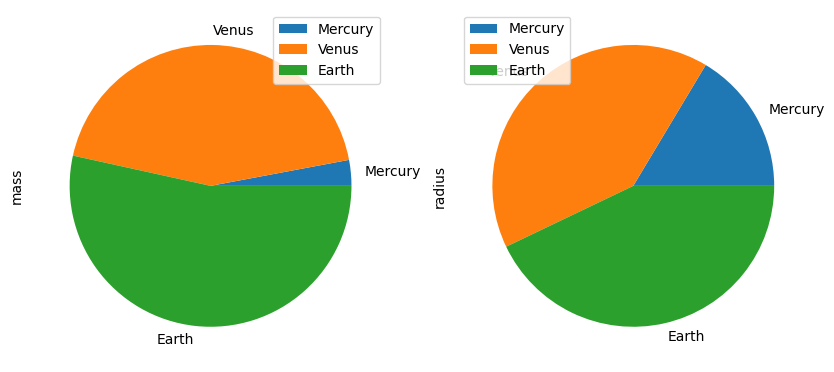

In [94]:
# plot column-based subplot pie chart
df12.plot.pie(subplots=True, figsize=(10, 5))

### Pandas Scatter Matrix Plotting

In [100]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

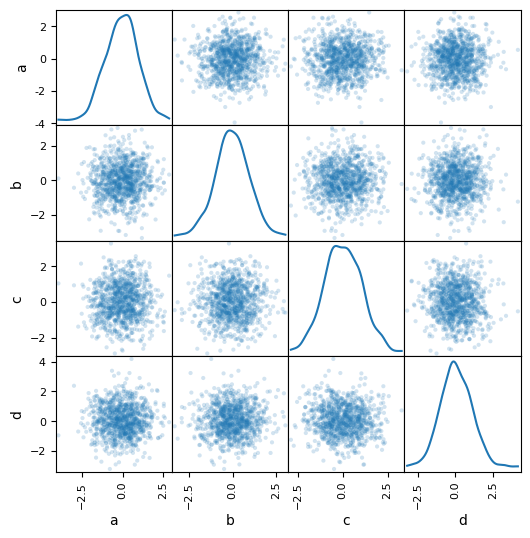

In [101]:
# prepare data and plot scatter matrix using kernel density estimation
df13 = pd.DataFrame(np.random.randn(1000, 4), columns=list('abcd'))
scatter_matrix(df13, alpha=0.2, figsize=(6, 6), diagonal='kde')

### Kernel Density Estimation with Density Plotting

<AxesSubplot:ylabel='Density'>

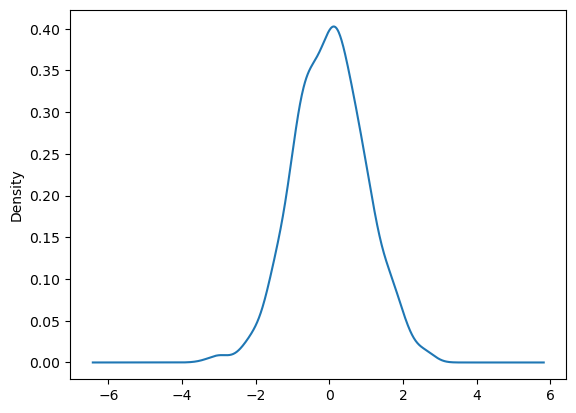

In [103]:
# makes probability density function graph using KDE
# prepare data and plot density with KDE
# histogram: represents frequency, density graph: represents density
ts3 = pd.Series(np.random.randn(1000))
ts3.plot.density()